In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import pickle




In [2]:
PATH = r'E:\Project\Language_det_train.csv'

In [3]:
df = pd.read_csv(PATH)

In [4]:
df = df[df['Language'].isin(['Arabic','English'])]

In [5]:
# target_values = ['Arabic','English']
# # Create a boolean mask to identify rows where the 'Language' column doesn't match the target values
# mask = ~df['Language'].isin(target_values)

# # Update the 'Language' column for the rows that don't match the target values
# df.loc[mask, 'Language'] = 'Other'

In [6]:
df.head()

,Text,Language
4,تعرف على ما إذا كان شخص ما يقول نكتة رائعة يمك...,Arabic
8,you were saying .if somebody got a job of his ...,English
16,هذا سؤال جيد.,Arabic
17,[23] عزا فريق في مركز بالو ألتو للأبحاث هذا ال...,Arabic
25,إنها جيدة بالنسبة لك ، سيكون أفضل بدونك وهذا م...,Arabic


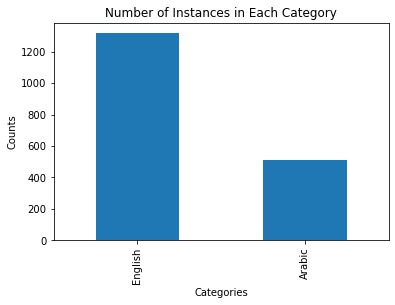

In [7]:
 #DataFrame named df with a column named "Language" containing the categories

# Count the number of instances in each category
category_counts = df['Language'].value_counts()

# Plotting the bar chart
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Number of Instances in Each Category')
plt.show()


In [8]:
# Step 1: Load and preprocess the data
# Assume you have a list of sentences `sentences` and their corresponding labels `labels`
sentences = list(df['Text'])  # List of sentences
labels = list(df['Language'])  # List of corresponding labels

In [9]:
# Step 2: Split the data into training and test sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)


In [10]:
# Step 3: Feature extraction
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_sentences)
test_features = vectorizer.transform(test_sentences)

In [11]:
# Step 4: Train the language detection model
model = LogisticRegression()
model.fit(train_features, train_labels)


LogisticRegression()

In [12]:
# Step 5: Evaluate the model
predictions = model.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9945205479452055


In [13]:
from sklearn.metrics import classification_report
# Step 5: Evaluate the model
predictions = model.predict(test_features)
accuracy = classification_report(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

      Arabic       0.98      1.00      0.99       111
     English       1.00      0.99      1.00       254

    accuracy                           0.99       365
   macro avg       0.99      1.00      0.99       365
weighted avg       0.99      0.99      0.99       365



In [14]:
def predict_language(sentence, vectorizer, model):
    # Preprocess the sentence
#     preprocessed_sentence = preprocess(sentence)  # Replace `preprocess` with your own preprocessing function

    # Convert the preprocessed sentence into numerical features
    features = vectorizer.transform([sentence])

    # Make the prediction using the language detection model
    predicted_label = model.predict(features)[0]

    return predicted_label

In [15]:
%%time
predict_language('سوف اذهب الي مصر', vectorizer, model)

Wall time: 999 µs


'Arabic'

In [16]:
def save_variable(variable, filepath):
    with open(filepath, 'wb') as file:
        pickle.dump(variable, file)

In [17]:
save_variable(vectorizer,"lang_vectorizer.pkl")

In [18]:
save_variable(model,"lang_model.pkl")